In [1]:
pwd

'd:\\project\\shelv_monitoring\\shelv_monitoring\\notebooks'

In [2]:
%cd ..

d:\project\shelv_monitoring\shelv_monitoring


In [4]:
from ultralytics import YOLO
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils.data_class import product_data

In [5]:
model =YOLO("models/product.pt")

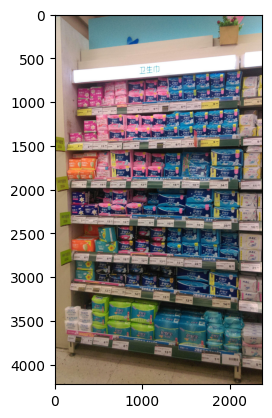

In [6]:
img = cv2.imread("data/test_1004_jpg.rf.jpg")
torgb = lambda img: cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(torgb(img))

In [16]:
results=model(img)
products=results[0].boxes.xyxy


0: 256x160 155 objects, 100.4ms
Speed: 6.4ms preprocess, 100.4ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 160)


In [25]:
product = products[0]

In [30]:
product.numpy()

array([     1273.7,      2611.1,      1455.4,      2776.3], dtype=float32)

In [ ]:
def draw_prod(img, product_data):
    
    product_int = product_data.numpy().astype(np.int32)
    pt1 = tuple(product_int[:2])  
    pt2 = tuple(product_int[2:])  
    
    cv2.rectangle(img, pt1, pt2, color=(100, 0, 255), thickness=26)
    return img


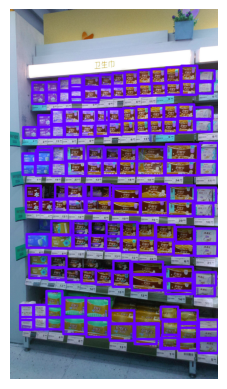

In [ ]:
img_copy = img.copy()
for product in products:
        draw_prod(img_copy, product)
     
plt.imshow(img_copy)
plt.axis('off')  
plt.show()

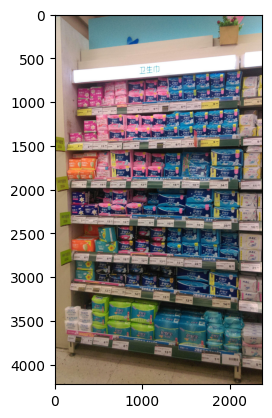

In [ ]:
def detect_products(img):
    results=model(img)
    products=results[0].boxes.xyxy
    products_objs=[product_data(product) for product in products]
    return products_objs
